# Importing Necessary Libraries


In [1]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Load Data

The excel data is loaded into a dataframe and the first 5 rows are displayed

In [2]:
# load data into dataframe 
rental = pd.read_csv("C://Dataset_House_Rent.csv", index_col=0, low_memory=False)
rental.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
Posted On,,,,,,,,,,,
18-05-2022,2,10000,1100,0.0,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
13-05-2022,2,20000,800,1.0,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
16-05-2022,2,17000,1000,1.0,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
04-07-2022,2,10000,800,1.0,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
09-05-2022,2,7500,850,1.0,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
# check the summary info of the dataframe
rental.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4746 entries, 18-05-2022 to 04-05-2022
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4746 non-null   int64  
 1   Rent               4746 non-null   int64  
 2   Size               4746 non-null   int64  
 3   Floor              4745 non-null   float64
 4   Area Type          4746 non-null   object 
 5   Area Locality      4746 non-null   object 
 6   City               4746 non-null   object 
 7   Furnishing Status  4746 non-null   object 
 8   Tenant Preferred   4746 non-null   object 
 9   Bathroom           4746 non-null   int64  
 10  Point of Contact   4746 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 444.9+ KB


------------------------------------------------------------------------------------------------------
# Preprocessing the data

<u>Preprocessing</u> the dataset is essential for machine learning algorithms because it helps improve the quality and suitability of the data for modeling. 

---------------------------------------------------------------
## Drop Missing Values

In [4]:
# check for missing values
rental.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Floor                1
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [5]:
# drop missing values
rental = rental.dropna()
rental = rental.reset_index(drop=True)

In [6]:
# check for missing values again
rental.isnull().sum()

BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

-----------------------

## Drop Duplicate Values

In [7]:
print("There are {} duplicate values.".format(rental.duplicated().sum()))
rental[rental.duplicated(keep=False)].head(10)

There are 11 duplicate values.


,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
71,2,16000,850,1.0,Carpet Area,Salt Lake City Sector 1,Kolkata,Semi-Furnished,Bachelors,1,Contact Agent
72,2,16000,850,1.0,Carpet Area,Salt Lake City Sector 1,Kolkata,Semi-Furnished,Bachelors,1,Contact Agent
133,1,4700,250,1.0,Super Area,Kaikhali,Kolkata,Furnished,Bachelors/Family,1,Contact Owner
203,1,4700,250,1.0,Super Area,Kaikhali,Kolkata,Furnished,Bachelors/Family,1,Contact Owner
428,2,5500,450,1.0,Carpet Area,Bisharpara,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
429,2,5500,450,1.0,Carpet Area,Bisharpara,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
679,4,150000,1460,11.0,Carpet Area,"Insignia, Bandra East",Mumbai,Semi-Furnished,Bachelors/Family,4,Contact Agent
866,4,150000,1460,11.0,Carpet Area,"Insignia, Bandra East",Mumbai,Semi-Furnished,Bachelors/Family,4,Contact Agent
931,3,150000,1300,6.0,Carpet Area,Seven Bungalows,Mumbai,Semi-Furnished,Bachelors/Family,3,Contact Agent
1051,3,150000,1300,6.0,Carpet Area,Seven Bungalows,Mumbai,Semi-Furnished,Bachelors/Family,3,Contact Agent


In [8]:
# remove duplicate values
rental = rental.drop_duplicates()
rental = rental.reset_index(drop=True)

In [9]:
# check for duplicate values after removing duplicates
print("There are {} duplicate values.".format(rental.duplicated().sum()))
rental.head()

There are 0 duplicate values.


,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,0.0,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1.0,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1.0,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1.0,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1.0,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


---------------------------------

## Clean Data

In [10]:
# select columns that we want to work with
rental = rental[["BHK", "Rent", "Size", "Floor", "Area Type", "City", "Furnishing Status", "Bathroom"]]
rental.head(10)

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Bathroom
0,2,10000,1100,0.0,Super Area,Kolkata,Unfurnished,2
1,2,20000,800,1.0,Super Area,Kolkata,Semi-Furnished,1
2,2,17000,1000,1.0,Super Area,Kolkata,Semi-Furnished,1
3,2,10000,800,1.0,Super Area,Kolkata,Unfurnished,1
4,2,7500,850,1.0,Carpet Area,Kolkata,Unfurnished,1
5,2,7000,600,0.0,Super Area,Kolkata,Unfurnished,2
6,2,10000,700,0.0,Super Area,Kolkata,Unfurnished,2
7,1,5000,250,1.0,Super Area,Kolkata,Unfurnished,1
8,2,26000,800,1.0,Carpet Area,Kolkata,Unfurnished,2
9,2,10000,1000,1.0,Carpet Area,Kolkata,Semi-Furnished,2


In [11]:
# check for typo or wrong spelling for City column
rental["City"].value_counts()

Mumbai       968
Chennai      891
Bangalore    885
Hyderabad    868
Delhi        601
Kolkata      521
Name: City, dtype: int64

### There are no typos in the City column

In [12]:
# check for typo or wrong spelling for Furnishing Status column
rental["Furnishing Status"].value_counts()

Semi-Furnished    2244
Unfurnished       1812
Furnished          678
Name: Furnishing Status, dtype: int64

### There are no errors in the Furnishing Status column

In [13]:
#check for typo or errors in the Area Type column
rental['Area Type'].value_counts()

Super Area     2444
Carpet Area    2288
Built Area        2
Name: Area Type, dtype: int64

### There are no errors in the Area Type Column

----------------------------------------------
### Since we are working with property data, it is impossible or does not make sense to have 0 values for certain columns
### we need to drop observations with value = 0 for these columns

In [14]:
# drop BHK = 0
rental = rental[rental["BHK"] != 0].reset_index(drop=True)

# drop Rent = 0
rental = rental[rental["Rent"] != 0].reset_index(drop=True)

# drop Size = 0
rental = rental[rental["Size"] != 0].reset_index(drop=True)

# drop Bathroom = 0
rental = rental[rental["Bathroom"] != 0].reset_index(drop=True)

rental.head(10)

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Bathroom
0,2,10000,1100,0.0,Super Area,Kolkata,Unfurnished,2
1,2,20000,800,1.0,Super Area,Kolkata,Semi-Furnished,1
2,2,17000,1000,1.0,Super Area,Kolkata,Semi-Furnished,1
3,2,10000,800,1.0,Super Area,Kolkata,Unfurnished,1
4,2,7500,850,1.0,Carpet Area,Kolkata,Unfurnished,1
5,2,7000,600,0.0,Super Area,Kolkata,Unfurnished,2
6,2,10000,700,0.0,Super Area,Kolkata,Unfurnished,2
7,1,5000,250,1.0,Super Area,Kolkata,Unfurnished,1
8,2,26000,800,1.0,Carpet Area,Kolkata,Unfurnished,2
9,2,10000,1000,1.0,Carpet Area,Kolkata,Semi-Furnished,2


In [15]:
# check the summary info of the dataframe after cleaning the data
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4734 entries, 0 to 4733
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BHK                4734 non-null   int64  
 1   Rent               4734 non-null   int64  
 2   Size               4734 non-null   int64  
 3   Floor              4734 non-null   float64
 4   Area Type          4734 non-null   object 
 5   City               4734 non-null   object 
 6   Furnishing Status  4734 non-null   object 
 7   Bathroom           4734 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 296.0+ KB


------------------------------------------
## Check for Outliers
Checking for outliers is important in preprocessing for machine learning algorithms, outliers can significantly impact the model's performance and results. Outliers can distort statistical measures, affect parameter estimation, and lead to biased predictions. By identifying and handling outliers appropriately, we can ensure more accurate and robust models that better capture the underlying patterns in the data.

In [16]:
# take a look at the statistics of the Rent column
with pd.option_context('float_format', '{:f}'.format): print(rental["Rent"].describe())

count      4734.000000
mean      34943.962822
std       78146.243354
min        1200.000000
25%       10000.000000
50%       16000.000000
75%       33000.000000
max     3500000.000000
Name: Rent, dtype: float64


<b> Note:</b> The values range from 1,200 up to 3,500,000 with a median value of only 16,000 indicates that there might be presence of outliers in the dataset.

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


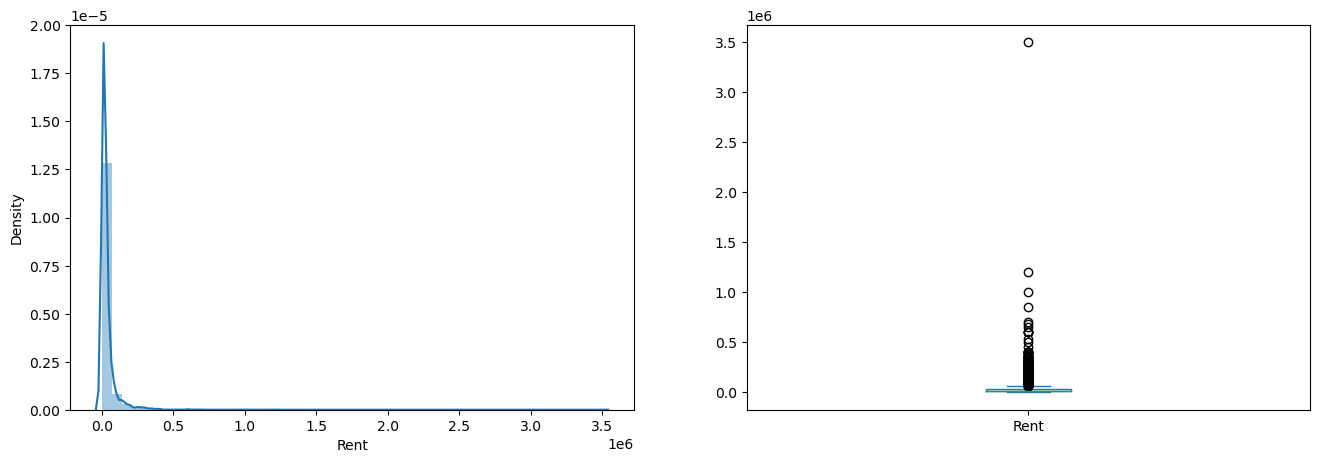

In [17]:
# create distribution plot and boxplot to check for outliers

plt.subplot(121)
sns.distplot(rental["Rent"]);

plt.subplot(122)
rental["Rent"].plot.box(figsize=(16,5))

plt.show()


<b>Note:</b> This verifies the existence of outliers in th rent column and they will distort the models to be built later. To overcome this, we will only take into account Rent less than 100,000 to be used in model building.


--------

In [18]:
# limit the Rent to be less than or equal to 100,000
rental = rental[rental["Rent"] <= 100000].reset_index(drop=True)
print("Data type is {0} \n\nShape of dataframe is {1}\n".format(type(rental), rental.shape))

Data type is <class 'pandas.core.frame.DataFrame'> 

Shape of dataframe is (4457, 8)



<b>Note</b>: The data points have been reduced from <u>4734</u> to <u>4457</u> i.e. <u>277</u> outliers have been removed, which is <u>5.851%</u> of original data removed.

In [19]:
#Check again
# take a look at the statistics of the Rent column
with pd.option_context('float_format', '{:f}'.format): print(rental["Rent"].describe())

count     4457.000000
mean     22736.082567
std      19903.224222
min       1200.000000
25%      10000.000000
50%      15000.000000
75%      28000.000000
max     100000.000000
Name: Rent, dtype: float64


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


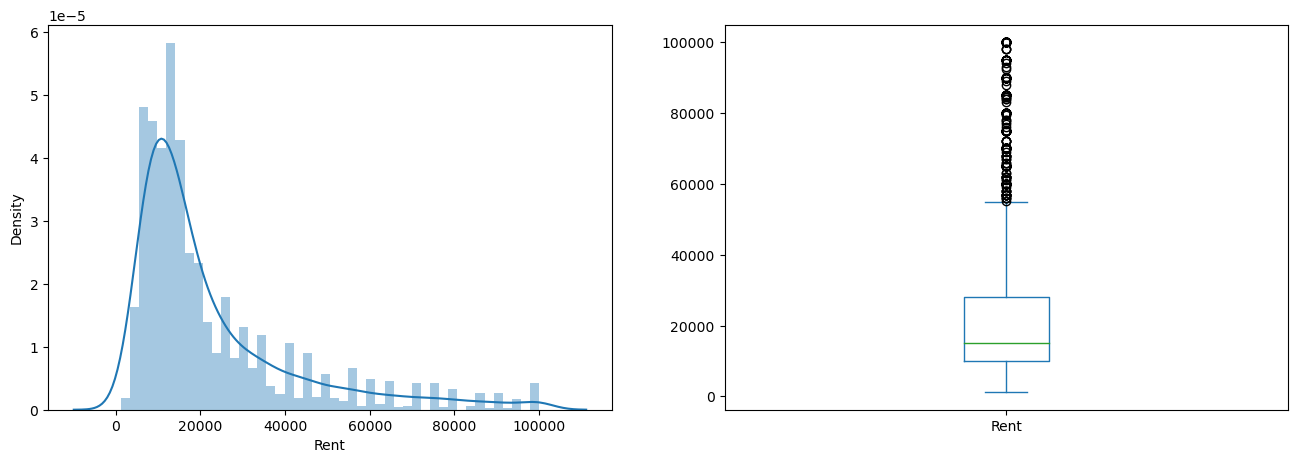

In [20]:
# create distribution plot and boxplot to check for outliers

plt.subplot(121)
sns.distplot(rental["Rent"]);

plt.subplot(122)
rental["Rent"].plot.box(figsize=(16,5))

plt.show()

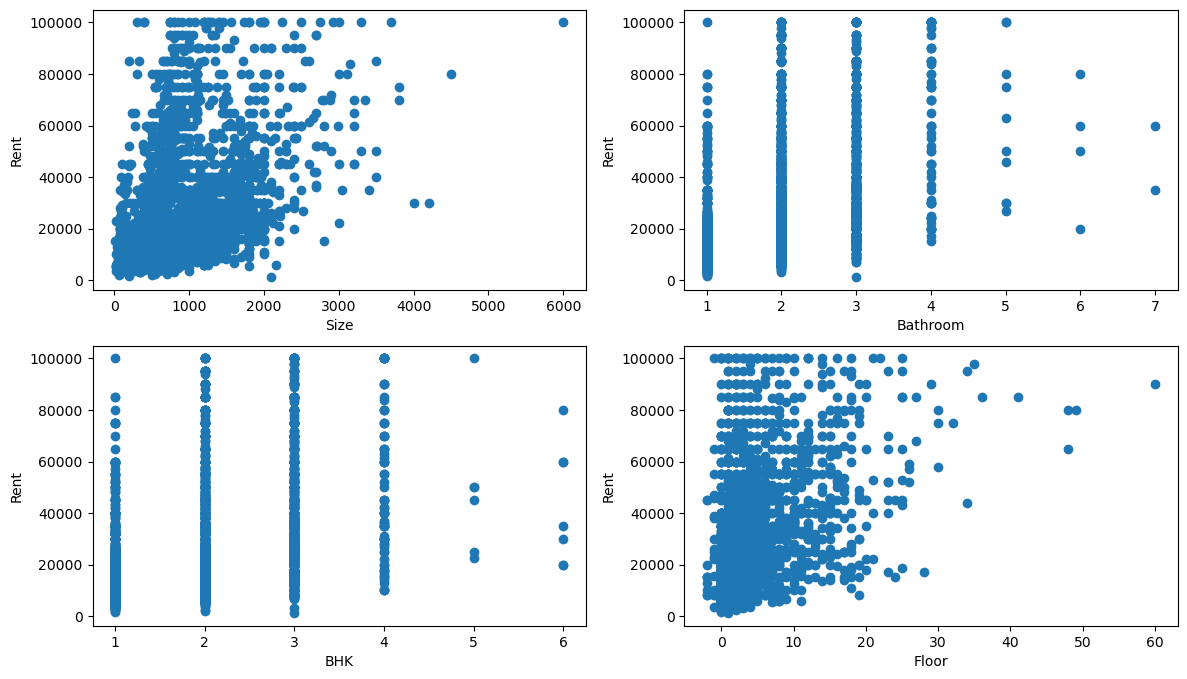

In [21]:
# visualize the relationship using scatter plots

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.scatter(x=rental["Size"], y=rental["Rent"])
plt.xlabel("Size")
plt.ylabel("Rent")

plt.subplot(2, 2, 2)
plt.scatter(x=rental["Bathroom"], y=rental["Rent"])
plt.xlabel("Bathroom")
plt.ylabel("Rent")

plt.subplot(2, 2, 3)
plt.scatter(x=rental["BHK"], y=rental["Rent"])
plt.xlabel("BHK")
plt.ylabel("Rent")

plt.subplot(2, 2, 4)
plt.scatter(x=rental["Floor"], y=rental["Rent"])
plt.xlabel("Floor")
plt.ylabel("Rent")

plt.show()

In [22]:
# calculate correlation matrix
corr = rental[["Size", "Bathroom", "BHK", "Floor", "Rent"]].corr()
corr

,Size,Bathroom,BHK,Floor,Rent
Size,1.000000,0.688119,0.701582,0.078504,0.400286
Bathroom,0.688119,1.000000,0.766105,0.216166,0.525370
BHK,0.701582,0.766105,1.000000,0.107904,0.423454
Floor,0.078504,0.216166,0.107904,1.000000,0.484251
Rent,0.400286,0.525370,0.423454,0.484251,1.000000


<b>Heat Map</b> : A heatmap is a graphical representation of data where values are encoded as colors. It is typically used to visualize the distribution and intensity of values across a two-dimensional space, such as a grid or a map.

The colors in a heatmap are used to represent the magnitude or density of the data values. Typically, a color gradient is used, where different colors correspond to different values. The specific color scheme used can vary depending on the context and the purpose of the heatmap.

In a typical heatmap color scheme, lighter or brighter colors such as yellow or white represent high values, while darker colors such as blue or black represent low values. The exact color scheme used can vary, but the general principle is that the intensity or brightness of the color corresponds to the magnitude of the value being represented.


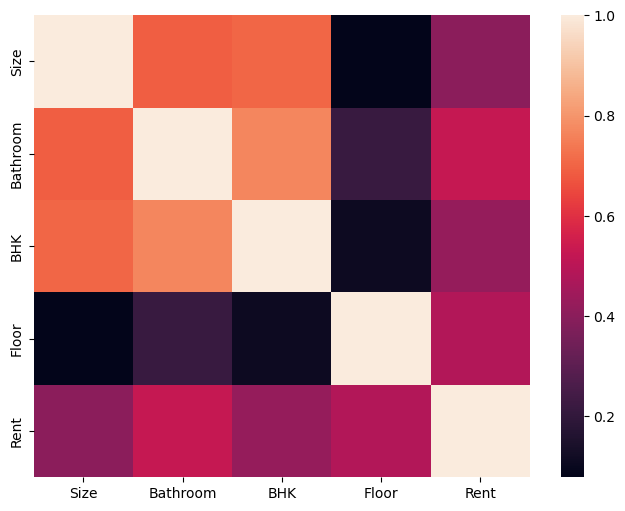

In [23]:
# visualize correlation matrix
plt.subplots(figsize=(8,6))

fig = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

----------------------------------------
## One Hot Encoding

One-hot encoding is a popular technique used in preprocessing data for machine learning algorithms, especially when dealing with categorical variables. It transforms categorical data into a binary vector representation, allowing machine learning algorithms to effectively handle categorical features as input.

The basic idea behind one-hot encoding is to convert each categorical value into a binary vector that indicates the presence or absence of a particular category.

In [24]:
# one hot encoding
rental_df = pd.get_dummies(rental)

rental_df.head()

,BHK,Rent,Size,Floor,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
0,2,10000,1100,0.0,2,0,0,1,0,0,0,0,1,0,0,0,1
1,2,20000,800,1.0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,2,17000,1000,1.0,1,0,0,1,0,0,0,0,1,0,0,1,0
3,2,10000,800,1.0,1,0,0,1,0,0,0,0,1,0,0,0,1
4,2,7500,850,1.0,1,0,1,0,0,0,0,0,1,0,0,0,1


In [25]:
# check summary info to see if one hot encoding is done properly
print(rental_df.shape, "\n")
rental_df.info()

(4457, 17) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4457 entries, 0 to 4456
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BHK                               4457 non-null   int64  
 1   Rent                              4457 non-null   int64  
 2   Size                              4457 non-null   int64  
 3   Floor                             4457 non-null   float64
 4   Bathroom                          4457 non-null   int64  
 5   Area Type_Built Area              4457 non-null   uint8  
 6   Area Type_Carpet Area             4457 non-null   uint8  
 7   Area Type_Super Area              4457 non-null   uint8  
 8   City_Bangalore                    4457 non-null   uint8  
 9   City_Chennai                      4457 non-null   uint8  
 10  City_Delhi                        4457 non-null   uint8  
 11  City_Hyderabad                    4457 non-null   uint8 

---------------------------------------------

# Train and Build Models

We will build several models to predict "Rent" as target variable using seven features i.e. "Size", "Bathroom", "BHK", "Floor", "City", "Furnishing Status", and "Area Type".

In [26]:
# separate data into X features and Y target
X = rental_df.drop(columns=["Rent"])
Y = rental_df["Rent"]

In [27]:
# split data into random train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


--------
# Linear Regression

In [28]:
# fit a Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [29]:
# make predictions
y_pred = regressor.predict(X_test)

In [30]:
# calculate R-squared
lin_r=regressor.score(X_test,y_test)
print("Linear Regression R-squared: {}".format(lin_r))

Linear Regression R-squared: 0.6752057179346523


<b>Note:</b> A linear regression R-squared value of <u>0.6752057179346523</u> signifies that approximately <u>67.52</u>% of the variance in the dependent variable (target) can be explained by the independent variables (features) in the linear regression model.

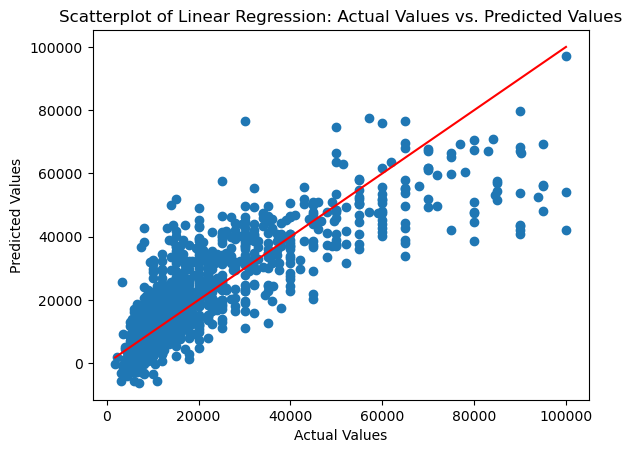

In [31]:
#plt.scatter(y_test, y_pred)
#plt.xlabel('Actual Values')
#plt.ylabel('Predicted Values')
#plt.title('Actual vs. Predicted Values in Linear Regression')
#plt.show()
# Create a scatterplot
plt.scatter(y_test, y_pred)

# Calculate the minimum and maximum values of actual values
min_val = np.min(y_test)
max_val = np.max(y_test)

# Generate x-values for the line of best fit
x_line = np.linspace(min_val, max_val, 100)

# Calculate y-values for the line of best fit (using linear regression equation)
y_line = x_line  # Assuming a simple y = x linear relationship

# Plot the line of best fit
plt.plot(x_line, y_line, color='red')

# Add labels and title to the plot
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatterplot of Linear Regression: Actual Values vs. Predicted Values")

# Display the plot
plt.show()


In [32]:
# another method of calculating R-squared
from sklearn.metrics import r2_score
lin_r2 = r2_score(y_test, y_pred)

print("Linear Regression R-squared: {}".format(lin_r2))

Linear Regression R-squared: 0.6752057179346523


In [33]:
# calculate root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print("Linear Regression RMSE: {}".format(lin_rmse))

Linear Regression RMSE: 10603.96291928341


In [34]:
# calculate mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print("Linear Regression MAE: {}".format(lin_mae))

Linear Regression MAE: 7418.241528008255


In [35]:
# get feature coefficients
importance = regressor.coef_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{} : {}'.format(X_train.columns[index], (importance[index] )))

City_Hyderabad : -8438.241528078226
City_Kolkata : -7019.804140579927
City_Chennai : -5390.573510566668
City_Bangalore : -3727.1563102828395
Area Type_Super Area : -3249.70249698965
Furnishing Status_Unfurnished : -2405.4675366959004
Furnishing Status_Semi-Furnished : -1673.4011392863547
Size : 11.356225709449935
Floor : 565.3201577422012
Area Type_Carpet Area : 1056.8877391972433
Area Type_Built Area : 2192.814757792408
City_Delhi : 2729.7560571819135
BHK : 3461.181233190419
Furnishing Status_Furnished : 4078.868675982251
Bathroom : 4701.492011478564
City_Mumbai : 21846.019432325746


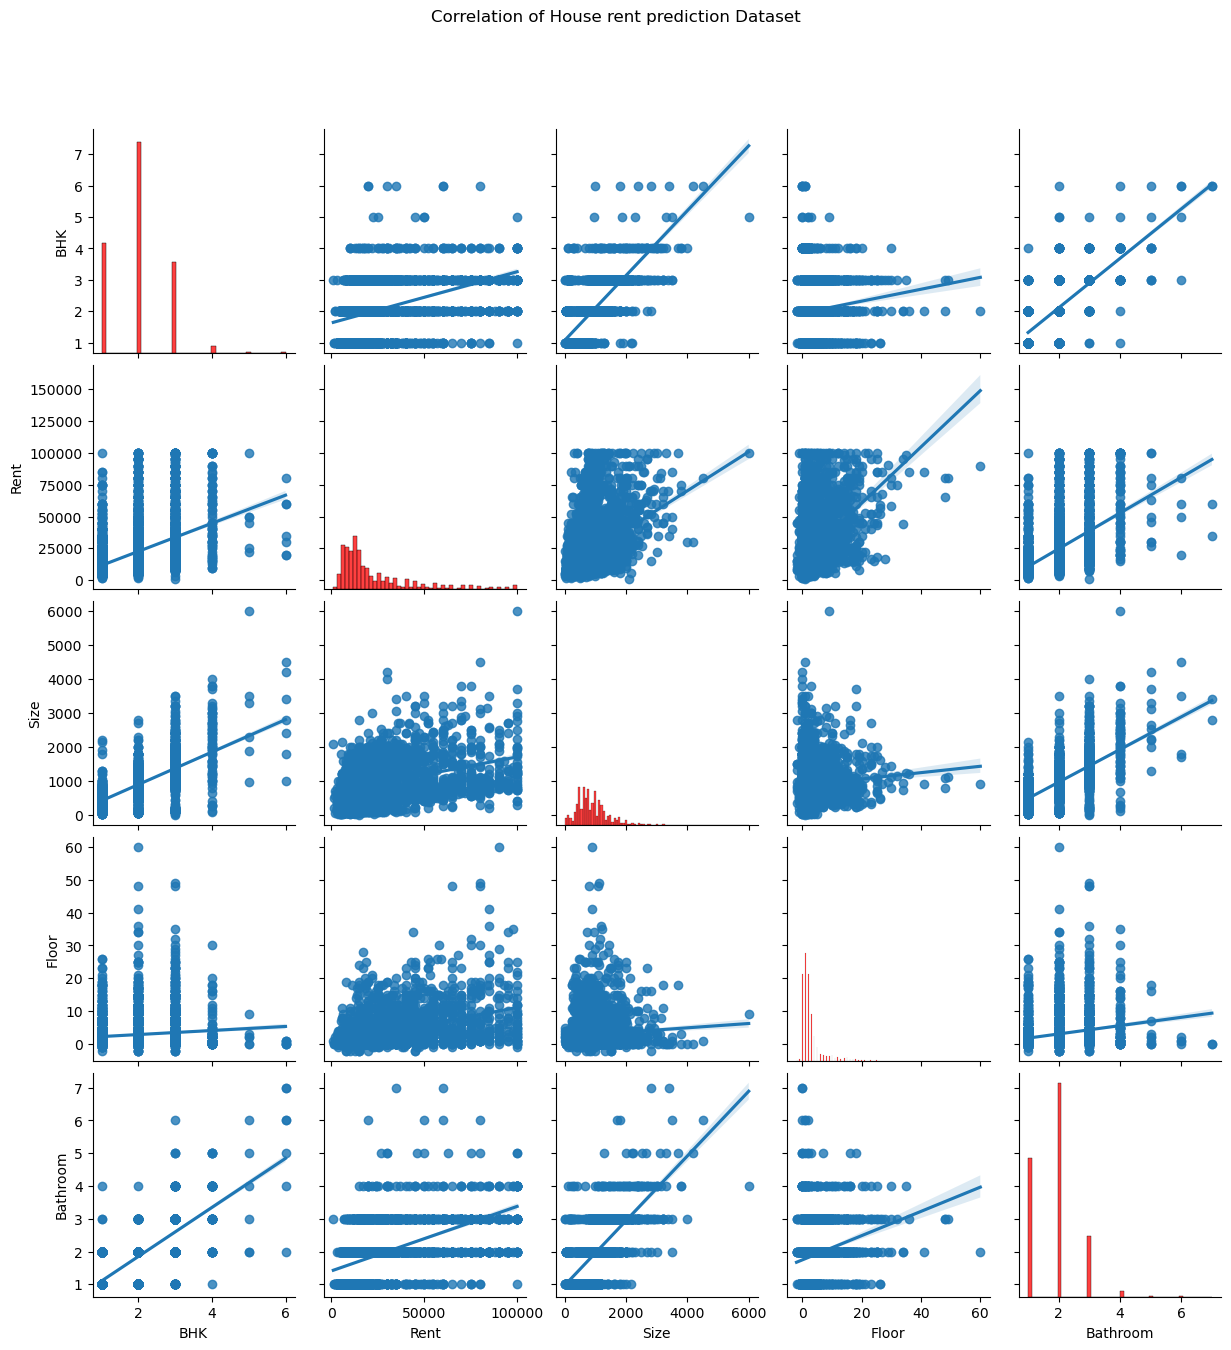

In [36]:
#Plot Correlation graphs
corr_graph= sns.pairplot(rental,kind="reg",diag_kws= {'color': 'red'})

corr_graph.fig.suptitle("Correlation of House rent prediction Dataset", y=1.08)

plt.show()

-------------------
# Random Forest

In [37]:
#import library
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

In [38]:
# fit the model
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [39]:
# make predictions 
y_pred = rf.predict(X_test)

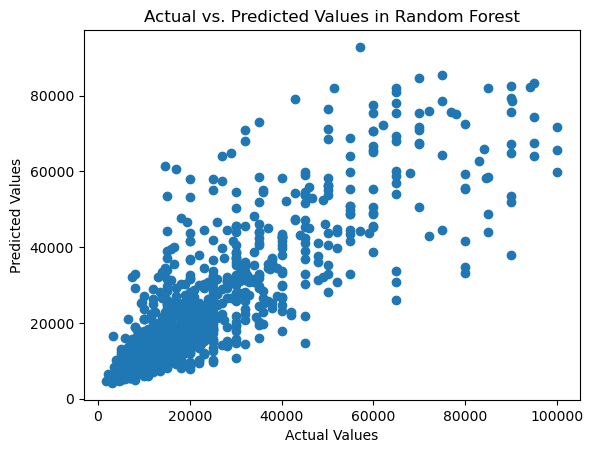

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values in Random Forest')
plt.show()

In [41]:
# calculate R-squared
forest_r=rf.score(X_test,y_test)
print("Random Forest R-squared: {}".format(forest_r))

Random Forest R-squared: 0.7115495327623773


In [42]:
# calculate root mean squared error (RMSE)
from sklearn.metrics import mean_squared_error

forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Regression RMSE: {}".format(forest_rmse))

Random Forest Regression RMSE: 9993.086261092827


In [43]:
# calculate mean absolute error (MAE)
from sklearn.metrics import mean_absolute_error

forest_mae = mean_absolute_error(y_pred, y_test)
print("Random Forest Regression MAE: {}".format(forest_mae))

Random Forest Regression MAE: 6379.650978548556


In [44]:
# import libraries, we will use GridSearchCV to find the best parameter values
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [45]:
# use gridsearch to find the best parameter

# provide range for max_depth from 1 to 5 with an interval of 1 and from 1 to 50 with an interval of 1 for n_estimators
params = {'max_depth': list(range(20, 30, 2)), 'n_estimators': list(range(30, 40, 2))}
rf = RandomForestRegressor(random_state=0)

# use gridsearch to find the best parameter
forest_reg = GridSearchCV(rf, params, cv=5)

In [46]:
# fit the model
forest_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [20, 22, 24, 26, 28],
                         'n_estimators': [30, 32, 34, 36, 38]})

In [47]:
# make predictions
y_pred = forest_reg.predict(X_test)

In [48]:
# get feature importances
importance = forest_reg.best_estimator_.feature_importances_

feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{} : {}'.format(X_train.columns[index], (importance[index] )))

Area Type_Built Area : 7.606209818080692e-07
City_Kolkata : 0.0025985340112212067
City_Bangalore : 0.0050256773315785555
City_Chennai : 0.005025939696683787
City_Hyderabad : 0.011297450922884976
Furnishing Status_Semi-Furnished : 0.01169428066742394
Furnishing Status_Unfurnished : 0.01227077924920203
Area Type_Carpet Area : 0.012534060240525585
Area Type_Super Area : 0.012793669344520392
Furnishing Status_Furnished : 0.017264906376001733
City_Delhi : 0.0251529889411138
BHK : 0.039071985318227954
Floor : 0.08247859730486998
Bathroom : 0.13854803828557274
City_Mumbai : 0.2968421645289786
Size : 0.32740016716021286


<AxesSubplot:title={'center':'Feature Importances'}>

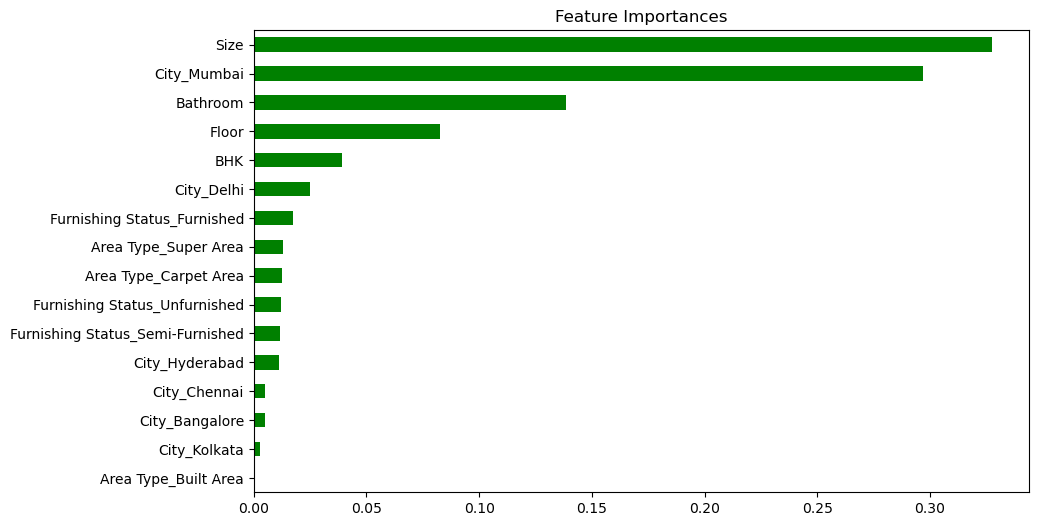

In [49]:
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
feat_importances = pd.Series(forest_reg.best_estimator_.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh", color="Green")
# feat_importances.nlargest(20).plot(kind='barh') # top 20 features only

------------------------
# Tensor Flow With Keras

In [50]:
# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras

## Feature Scaling

Feature scaling, also known as data normalization, is a preprocessing technique used to standardize the range of independent variables in a dataset. By scaling the features to a common range, it ensures that variables with different scales and ranges do not dominate the learning process in a neural network model. The MinMaxScaler module from sklearn.preprocessing can be employed, setting the feature range to (0, 1).

The following steps are involved in feature scaling:

1) Splitting the data into training and testing sets, with the possibility of including a validation set.

2) Perform feature normalization on the training data by subtracting the mean and dividing by the variance. It is crucial to avoid incorporating future information into the training data by calculating the mean and variance of the entire dataset.

3) Apply the same normalization parameters learned from the training data to normalize the testing instances. This ensures evaluation on unseen data and the ability to assess the model's generalization capabilities.

To implement feature scaling, the fit_transform() function is used on the training data to learn the scaling parameters and simultaneously scale the data. However, only the transform() function is applied to the testing data, using the learned scaling parameters from the training data.

In [51]:
print(X_train.shape)
X_train.head()

(3342, 16)


,BHK,Size,Floor,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
635,2,925,10.0,3,0,1,0,0,0,0,0,0,1,1,0,0
3332,1,1900,3.0,1,0,1,0,0,1,0,0,0,0,0,1,0
444,3,1100,1.0,2,0,0,1,0,0,0,0,1,0,0,1,0
1410,2,1000,0.0,2,0,0,1,1,0,0,0,0,0,0,1,0
1399,1,610,10.0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [52]:
print(X_test.shape)
X_test.head()

(1115, 16)


,BHK,Size,Floor,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
2714,1,25,4.0,1,0,0,1,0,0,1,0,0,0,0,1,0
775,2,630,6.0,2,0,1,0,0,0,0,0,0,1,0,0,1
117,3,840,1.0,2,0,1,0,0,0,0,0,1,0,0,0,1
4074,2,1100,3.0,2,0,0,1,0,0,0,1,0,0,0,1,0
639,1,460,7.0,2,0,1,0,0,0,0,0,0,1,0,0,1


In [53]:
# import MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

# define the scaler 
scaler = MinMaxScaler(feature_range=(0, 1))

X_train[["Size", "Bathroom", "BHK", "Floor"]] = scaler.fit_transform(X_train[["Size", "Bathroom", "BHK", "Floor"]])

X_test[["Size", "Bathroom", "BHK", "Floor"]] = scaler.transform(X_test[["Size", "Bathroom", "BHK", "Floor"]])


In [54]:
print(X_train.shape)
X_train.head()

(3342, 16)


,BHK,Size,Floor,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
635,0.2,0.202009,0.235294,0.333333,0,1,0,0,0,0,0,0,1,1,0,0
3332,0.0,0.419643,0.098039,0.000000,0,1,0,0,1,0,0,0,0,0,1,0
444,0.4,0.241071,0.058824,0.166667,0,0,1,0,0,0,0,1,0,0,1,0
1410,0.2,0.218750,0.039216,0.166667,0,0,1,1,0,0,0,0,0,0,1,0
1399,0.0,0.131696,0.235294,0.000000,0,0,1,1,0,0,0,0,0,0,1,0


In [55]:
print(X_test.shape)
X_test.head()

(1115, 16)


,BHK,Size,Floor,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
2714,0.0,0.001116,0.117647,0.000000,0,0,1,0,0,1,0,0,0,0,1,0
775,0.2,0.136161,0.156863,0.166667,0,1,0,0,0,0,0,0,1,0,0,1
117,0.4,0.183036,0.058824,0.166667,0,1,0,0,0,0,0,1,0,0,0,1
4074,0.2,0.241071,0.098039,0.166667,0,0,1,0,0,0,1,0,0,0,1,0
639,0.0,0.098214,0.176471,0.166667,0,1,0,0,0,0,0,0,1,0,0,1


## Create the model

We will utilize the Keras Sequential model to construct our neural network. The Sequential model allows for a linear stack of layers, making it simple to create the model by passing a list of layer instances to the constructor, which is set up using the command model = Sequential().

For this model we selecte two densely connected hidden layers with 64 hidden units each. This choice determines the degree of flexibility the network has in learning representations. Using more hidden units enables the network to learn more complex representations, but it also increases computational cost and the risk of overfitting.

Overfitting occurs when the model becomes too complex, capturing random noise rather than the underlying relationship. To mitigate overfitting, especially when training data is limited, it is advisable to employ a smaller network with fewer hidden layers.

Therfore, we will use the Rectified Linear Unit (ReLU) activation function, which is widely used due to its effectiveness. However, feel free to experiment with other activation functions like Hyperbolic Tangent (tanh).

To gain insights into the model, we can use attributes such as output_shape or employ the summary() function. Additionally, the get_config() function allows us to retrieve the configuration information of the model.

In [56]:
# import Sequential from keras.models
from keras.models import Sequential

# import Dense from keras.layers
from keras.layers import Dense

# initialize the constructor
model = Sequential()

# add a densely-connected layer with 64 units to the model
model.add(Dense(64, activation="relu", input_shape=(X_train.shape[1],)))

# add another layer with 64 units
model.add(Dense(64, activation="relu"))

# add an output layer with 1 output unit
model.add(Dense(1))

In [57]:
# model output shape
print(model.output_shape)

# model summary
print(model.summary())

(None, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1088      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5313 (20.75 KB)
Trainable params: 5313 (20.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [58]:
# model config
model.get_config()

{'name': 'sequential',
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 16),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'dense_input'},
   'registered_name': None},
  {'module': 'keras.layers',
   'class_name': 'Dense',
   'config': {'name': 'dense',
    'trainable': True,
    'dtype': 'float32',
    'batch_input_shape': (None, 16),
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'GlorotUniform',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'registered_name': None,
   'build_config': {'inpu

## Set up training

After constructing the model, the next step is to configure its learning process by using the compile method. The compile method accepts three crucial arguments:

1. Optimizer: This argument specifies the training procedure by providing an optimizer instance from the tf.train module. Examples of optimizers include tf.train.AdamOptimizer, tf.train.RMSPropOptimizer, or tf.train.GradientDescentOptimizer. For this case, we will use tf.train.RMSPropOptimizer with a learning rate of 0.001.

2. Loss: The loss function to minimize during the optimization process. Common choices include mean square error (mse), categorical_crossentropy, or binary_crossentropy. The loss function can be specified either by name or by passing a callable object from the tf.keras.losses module. In this scenario, we will utilize the mean square error (mse) loss.

3. Metrics: These are used to monitor the training progress. They can be either string names or callable objects from the tf.keras.metrics module. In this case, we will use mean absolute error (mae) as the metric to track during training.

In [59]:
optimizer=tf.keras.optimizers.RMSprop(0.001)
model.compile(loss="mse",
              optimizer=optimizer,
              metrics=["mae"])


## Train the Model

The model will be trained for 50 epochs, which means it will go through the entire training dataset 50 times. During training, 20% of the training data will be set aside as validation data. The model will not be trained on this validation data but will instead evaluate the loss and any model metrics on this data at the end of each epoch.

The batch_size will be set to the default value of 32. This means that during each training iteration, the model will process 32 samples at a time before updating the weights.

To monitor the training progress, the verbose argument is set to 1. This will display logs with an animated progress bar, showing the training progress for each epoch. If verbose is set to 0, nothing will be displayed (silent), while verbose=2 will only mention the number of epochs completed without showing the progress bar.

In [60]:
#Train the Model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
84/84 [==============================] - 1s 4ms/step - loss: 947613504.0000 - mae: 22960.8223 - val_loss: 903362496.0000 - val_mae: 22863.7539
Epoch 2/50
84/84 [==============================] - 0s 2ms/step - loss: 944762944.0000 - mae: 22901.7148 - val_loss: 898682944.0000 - val_mae: 22766.1504
Epoch 3/50
84/84 [==============================] - 0s 2ms/step - loss: 937745472.0000 - mae: 22754.2969 - val_loss: 889055232.0000 - val_mae: 22563.4648
Epoch 4/50
84/84 [==============================] - 0s 2ms/step - loss: 924988864.0000 - mae: 22484.6621 - val_loss: 872999552.0000 - val_mae: 22221.1777
Epoch 5/50
84/84 [==============================] - 0s 2ms/step - loss: 905291520.0000 - mae: 22061.6660 - val_loss: 849497344.0000 - val_mae: 21710.0645
Epoch 6/50
84/84 [==============================] - 0s 2ms/step - loss: 877480704.0000 - mae: 21454.5176 - val_loss: 817569728.0000 - val_mae: 20996.9863
Epoch 7/50
84/84 [==============================] - 0s 2ms/step - loss: 8410

In [61]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


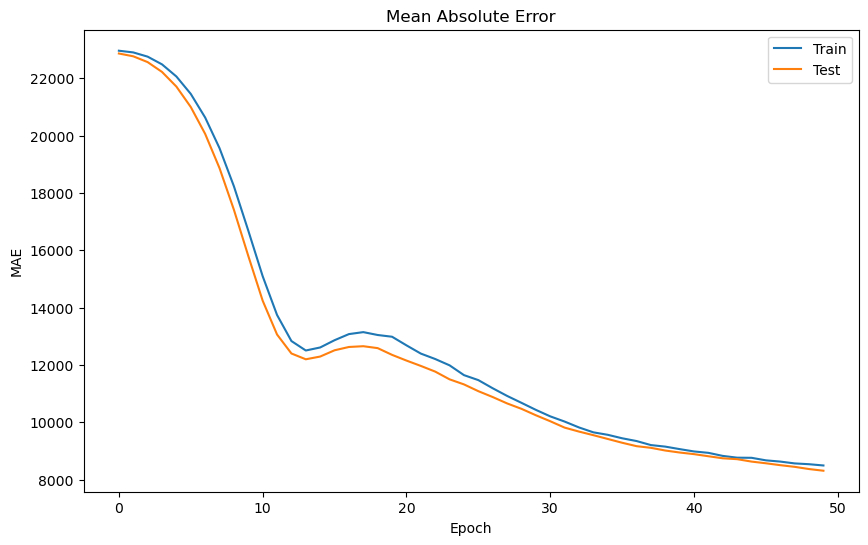

In [62]:
# summarize history for mean_absolute_error
plt.figure(figsize=(10,6))
plt.plot(history.history["mae"])
plt.plot(history.history["val_mae"])
plt.title("Mean Absolute Error")
plt.ylabel("MAE")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"])
plt.show()

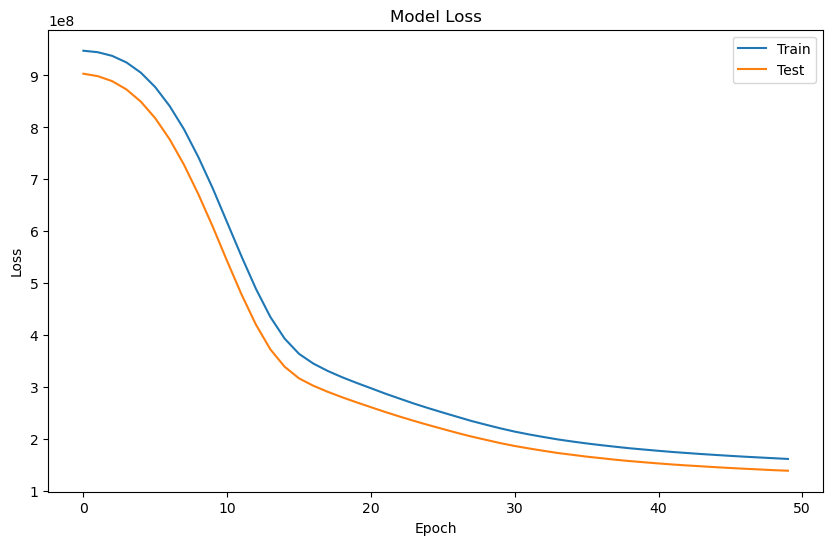

In [63]:
# summarize history for loss
plt.figure(figsize=(10,6))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"])
plt.show()

## Predict Values

In [64]:
#Predict values
y_pred = model.predict(X_test)

35/35 [==============================] - 0s 2ms/step


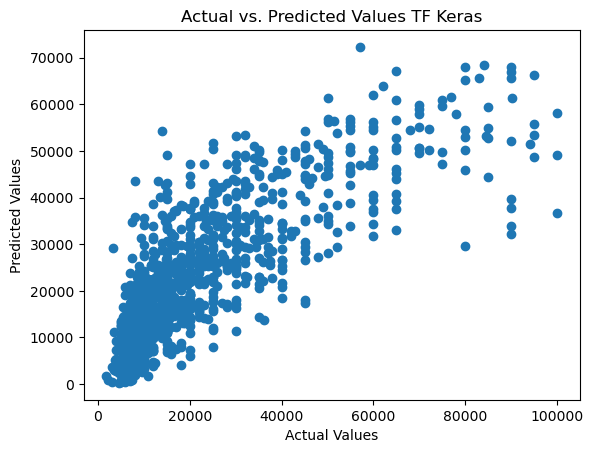

In [65]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values TF Keras')
plt.show()

## Evaluate Model

In [66]:
#Evaluate Model
[mse, mae] = model.evaluate(X_test, y_test, verbose=1)

35/35 [==============================] - 0s 1ms/step - loss: 127081536.0000 - mae: 7861.4253


In [67]:
#Calculate RMSE and MAE
keras_rmse = np.sqrt(int(mse))
keras_mae = mae

print("Testing set Root Mean Squared Error: {}".format(keras_rmse))
print("Testing set Mean Absolute Error: {}".format(keras_mae))

Testing set Root Mean Squared Error: 11273.044664153513
Testing set Mean Absolute Error: 7861.42529296875


In [68]:
# calculate R-squared
from sklearn.metrics import r2_score
keras_r2 = r2_score(y_test, y_pred)

print("Tensorflow with Keras Sequential model R-squared: {}".format(keras_r2))

Tensorflow with Keras Sequential model R-squared: 0.6329253514203486


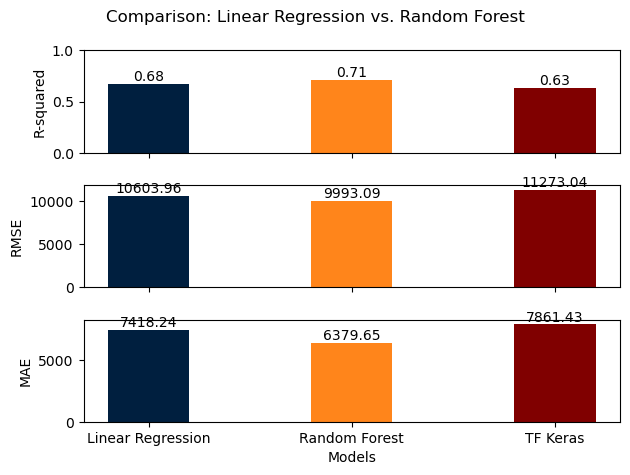

In [69]:
# Set the labels for the x-axis
labels = ['Linear Regression', 'Random Forest', 'TF Keras']

# Set the values for R-squared, RMSE, and MAE
r_values = [lin_r, forest_r, keras_r2]
rmse_values = [lin_rmse, forest_rmse, keras_rmse]
mae_values = [lin_mae, forest_mae, keras_mae]

# Set the positions of the bars on the x-axis
x = np.arange(len(labels))

# Set the width of the bars
width = 0.4

# Set the color scheme for each model
colors = ['#001F3F', '#FF851B', '#800000']  # Navy blue, dark orange, maroon

# Create the figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

# Plot the R-squared values
ax1.bar(x, r_values, width, color=colors)
ax1.set_ylabel('R-squared')
ax1.set_ylim(0, 1)

# Add values on top of bars
for rect, r, color in zip(ax1.patches, r_values, colors):
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width() / 2, height, f'{r:.2f}',
             ha='center', va='bottom', color='black')

# Plot the RMSE values
ax2.bar(x, rmse_values, width, color=colors)
ax2.set_ylabel('RMSE')

# Add values on top of bars
for rect, rmse, color in zip(ax2.patches, rmse_values, colors):
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width() / 2, height, f'{rmse:.2f}',
             ha='center', va='bottom', color='black')

# Plot the MAE values
ax3.bar(x, mae_values, width, color=colors)
ax3.set_xlabel('Models')
ax3.set_ylabel('MAE')

# Add values on top of bars
for rect, mae, color in zip(ax3.patches, mae_values, colors):
    height = rect.get_height()
    ax3.text(rect.get_x() + rect.get_width() / 2, height, f'{mae:.2f}',
             ha='center', va='bottom', color='black')

# Set the x-axis tick labels and title
plt.xticks(x, labels)
plt.suptitle('Comparison: Linear Regression vs. Random Forest')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [70]:
# combine all models' results into one dataframe
data = {"Model": ["Linear Regression", "Random Forest","TF Keras"], 
        "R-squared": [lin_r, forest_r,keras_r2],           
        "RMSE": [lin_rmse, forest_rmse,keras_rmse],
        "MAE": [lin_mae, forest_mae,keras_mae]}

results = pd.DataFrame(data=data)
results

,Model,R-squared,RMSE,MAE
0,Linear Regression,0.675206,10603.962919,7418.241528
1,Random Forest,0.711550,9993.086261,6379.650979
2,TF Keras,0.632925,11273.044664,7861.425293
